EDA

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Merged_eda = pd.read_csv('Merged_df.csv')

<Axes: xlabel='popularity', ylabel='Count'>

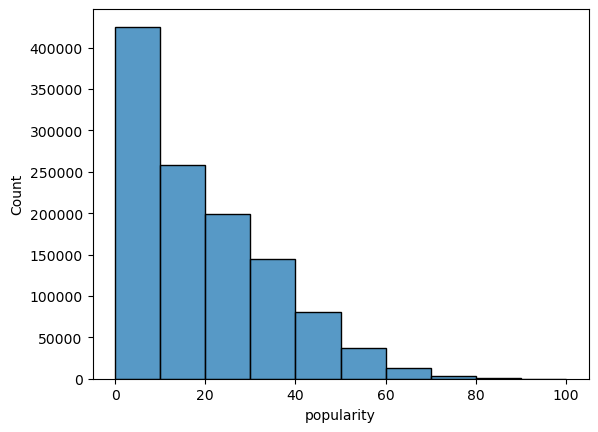

In [3]:
# Checking the distributions of all features
# Popularity

sns.histplot(x='popularity', data=Merged_eda,bins= 10)

From the chart, songs with popularity of 65 and above are outliers.  

<Axes: xlabel='danceability', ylabel='Count'>

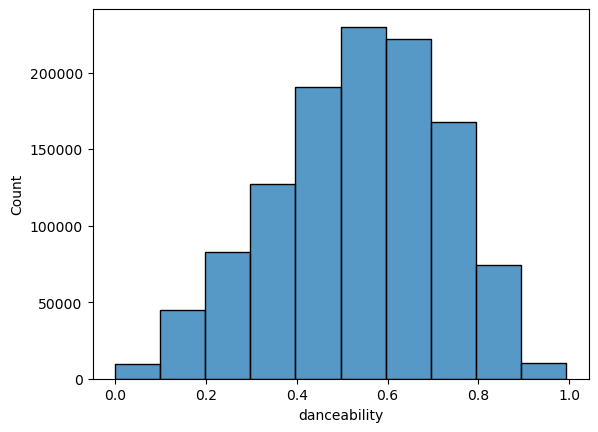

In [4]:
# danceability

sns.histplot(x='danceability', data=Merged_eda,bins= 10)

<Axes: xlabel='loudness', ylabel='Count'>

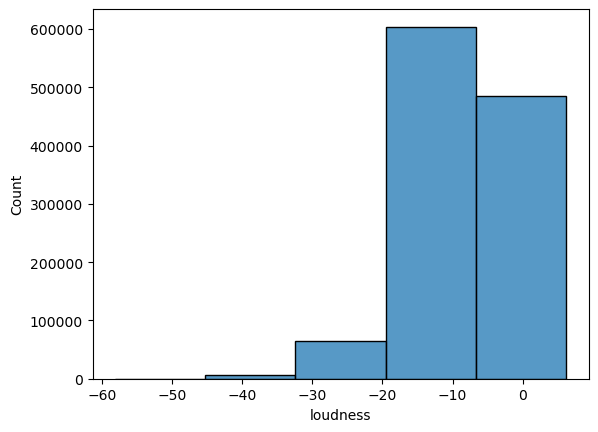

In [5]:
# loudness

sns.histplot(x='loudness', data=Merged_eda,bins= 5)

<Axes: xlabel='acousticness', ylabel='Count'>

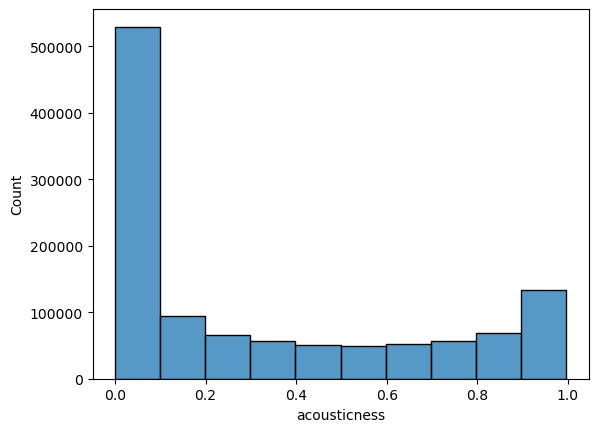

In [6]:
# Acousticness

sns.histplot(x='acousticness', data=Merged_eda,bins= 10)

<Axes: xlabel='instrumentalness', ylabel='Count'>

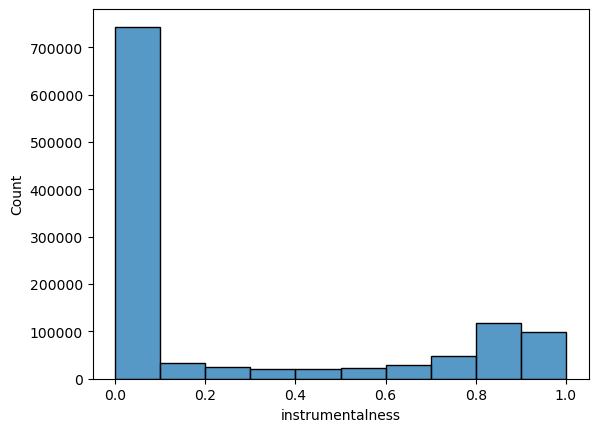

In [7]:
#Instrumentalness

sns.histplot(x='instrumentalness', data=Merged_eda,bins= 10)

<Axes: xlabel='liveness', ylabel='Count'>

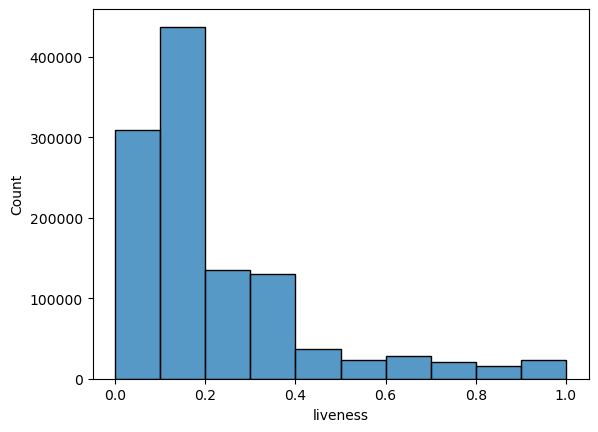

In [8]:
#liveness

sns.histplot(x='liveness', data=Merged_eda,bins= 10)

<Axes: xlabel='tempo', ylabel='Count'>

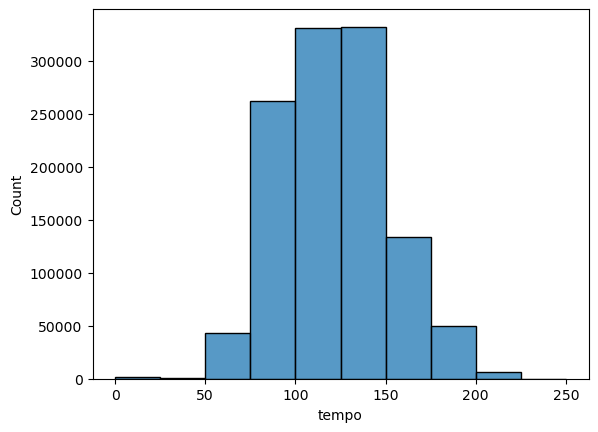

In [9]:
# tempo

sns.histplot(x='tempo', data=Merged_eda,bins= 10)

<Axes: xlabel='duration_ms', ylabel='Count'>

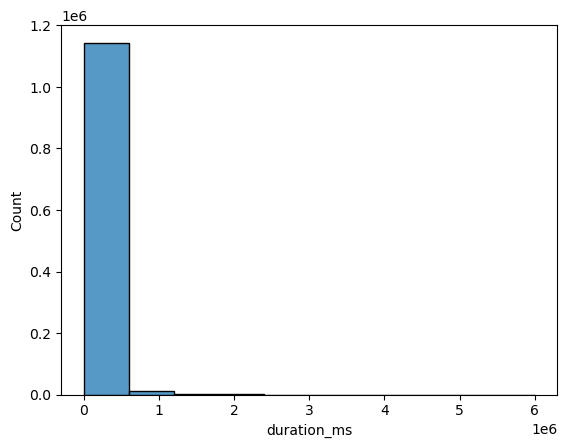

In [10]:
# Duration_ms

sns.histplot(x='duration_ms', data=Merged_eda,bins=10)

<Axes: xlabel='GDP', ylabel='Count'>

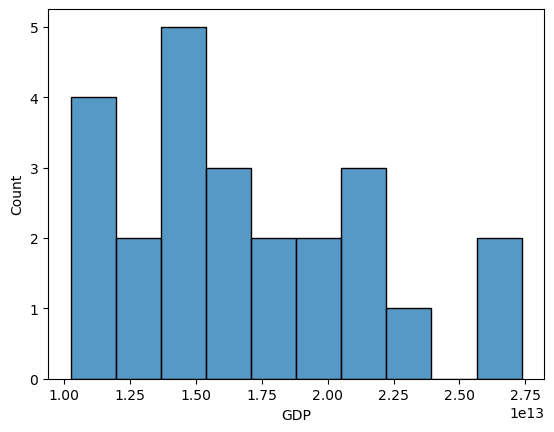

In [11]:
# GDP
sns.histplot(x='GDP', data=Merged_eda,bins= 10)

Exploring features by finding answers to :
1. Does instrumentalness suggest loudness of song?
2. Are songs getting louder as the years go by?
3. What music has the  longest duration?
4. What are the most popular tracks?


<Axes: xlabel='instrumentalness', ylabel='loudness'>

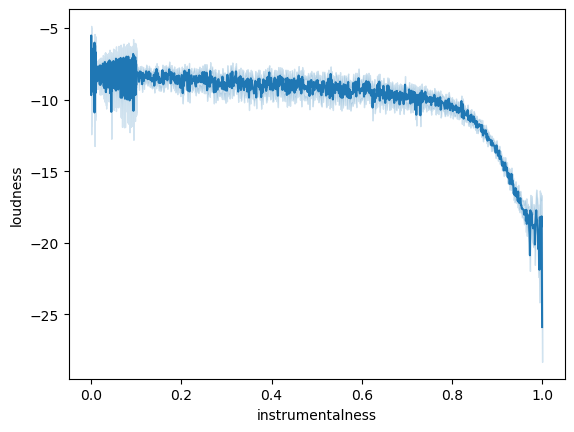

In [12]:
#Instrumentalness versus loudness

sns.lineplot(x= 'instrumentalness', y= 'loudness', data = Merged_eda)


Looks like as loudness decreases after instrumentalness increases from 0.6 threshold,otherwise loudness is stable from 0-0.6 instrumnetalness. This is to say that instrumentalness does not necessarily mean loud music.

<Axes: xlabel='year', ylabel='loudness'>

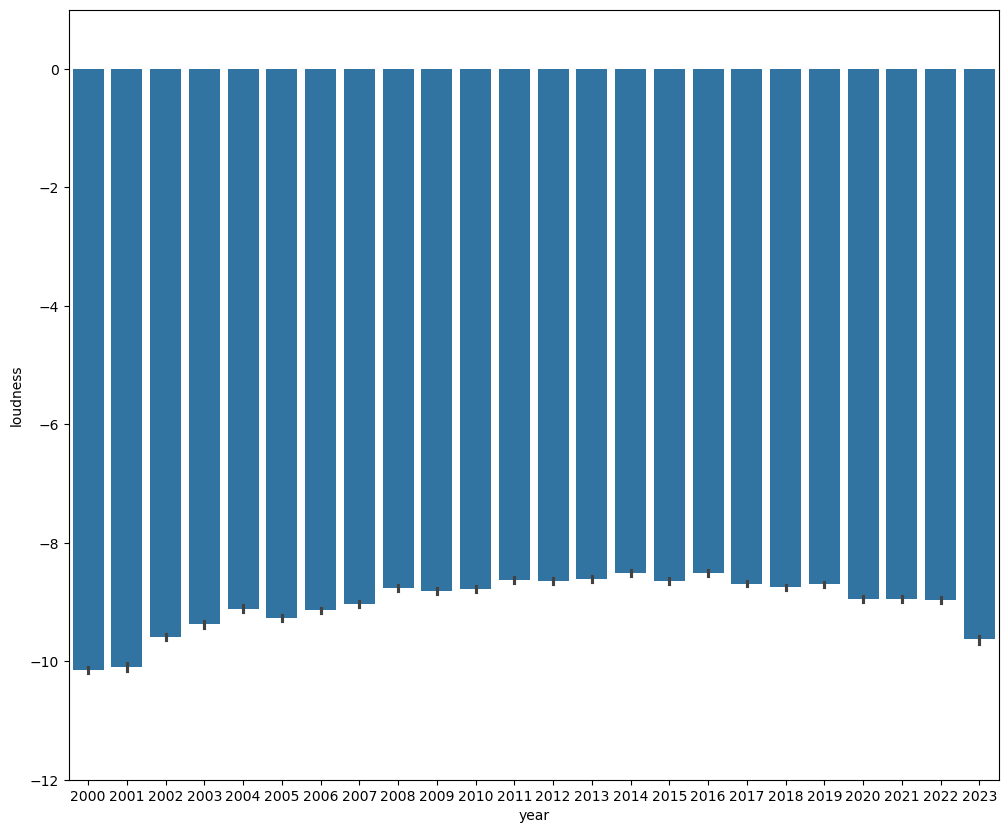

In [13]:
# Visualising loudeness of songs over the years

fig,ax= plt.subplots(figsize=(12,10))
ax.set_ylim([-12,1])
sns.barplot(y= 'loudness', x= 'year', data = Merged_eda)


Songs in the lower loudeness range(from -10 and below) were not common from 2002  to 2022. However, these song seem to have reemerged in 2023. Songs with wider loudness ranges are seen in 2023. Songs are not getting louder.

In [15]:

# converting duration from milliseconds to minutes

Merged_eda['duration_min'] = Merged_eda['duration_ms']/60000

Merged_eda['duration_min']



0          4.110000
1          2.632000
2          3.219783
3          3.467333
4          2.831550
             ...   
1159759    4.527617
1159760    4.632667
1159761    2.137500
1159762    1.033333
1159763    4.131267
Name: duration_min, Length: 1159764, dtype: float64

In [16]:
Merged_eda.head()

,Unnamed: 0,genre,year,track_name,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,duration_ms,GDP_year,GDP,duration_min
0,0,acoustic,2000,Easy Tonight,37,0.470,-8.018,0.259,0.000000,0.2040,84.843,246600,2000.0,1.025230e+13,4.110000
1,1,opera,2000,"Blumenlieder, Op. 500: No. 7, Herbstzeitlosen",0,0.258,-29.012,0.991,0.001190,0.0790,89.835,157920,2001.0,1.058180e+13,2.632000
2,2,opera,2000,"Blumenlieder, Op. 500: No. 15, Feuernelken",0,0.432,-26.235,0.989,0.002200,0.0618,136.726,193187,2002.0,1.093640e+13,3.219783
3,3,opera,2000,Die Gräfin Mariza: Einmal möchte ich wieder ta...,0,0.327,-14.306,0.963,0.000832,0.0888,97.870,208040,2003.0,1.145820e+13,3.467333
4,4,opera,2000,"Blumenlieder, Op. 500: No. 12, Anemonen",0,0.385,-24.274,0.992,0.002490,0.0712,83.645,169893,2004.0,1.221370e+13,2.831550


In [17]:
duration = Merged_eda[['track_name', 'duration_min']]

# Sorting duration_ms in ascending order and checking first 10 longest

duration_sorted = duration.sort_values(by= 'duration_min', ascending=True)
long_duration = duration_sorted[-10:]


<Axes: xlabel='duration_min', ylabel='track_name'>

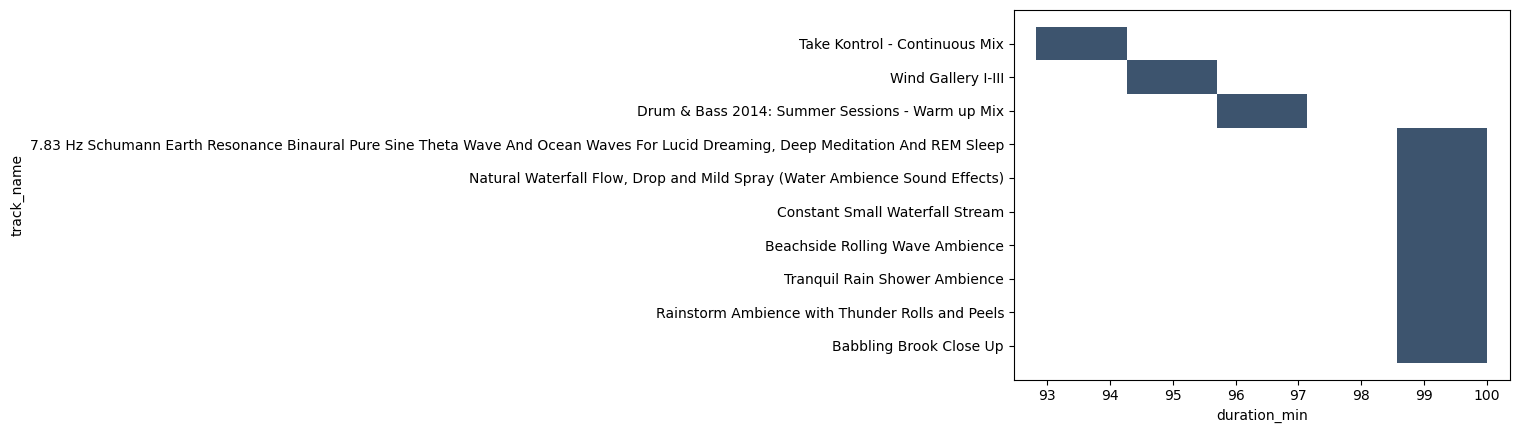

In [18]:
# first 10 longest tracks

sns.histplot(x= 'duration_min', y= 'track_name', data= long_duration)

In [19]:
# Checking and visualizing the most popular tracks(first 20)

most_popular_track= Merged_eda[['track_name','popularity']]
sorted = most_popular_track.sort_values(by='popularity', ascending= True)
most_popular_20 = sorted[-20:]
print(most_popular_20)

                                                track_name  popularity
1072110                                            Hey Mor          90
962612                                     Blinding Lights          90
1072373                                  Romantic Homicide          90
1105899                                         Yandel 150          91
633284                                    I Wanna Be Yours          91
1086150                                                AMG          91
1072346  Until I Found You (with Em Beihold) - Em Beiho...          91
1068697                                    I Ain't Worried          91
1072378                          Unholy (feat. Kim Petras)          92
1154688                                                OMG          92
1075110              Quevedo: Bzrp Music Sessions, Vol. 52          92
1072375                                          Anti-Hero          92
1072376                                       Here With Me          92
107235

<Axes: xlabel='popularity', ylabel='track_name'>

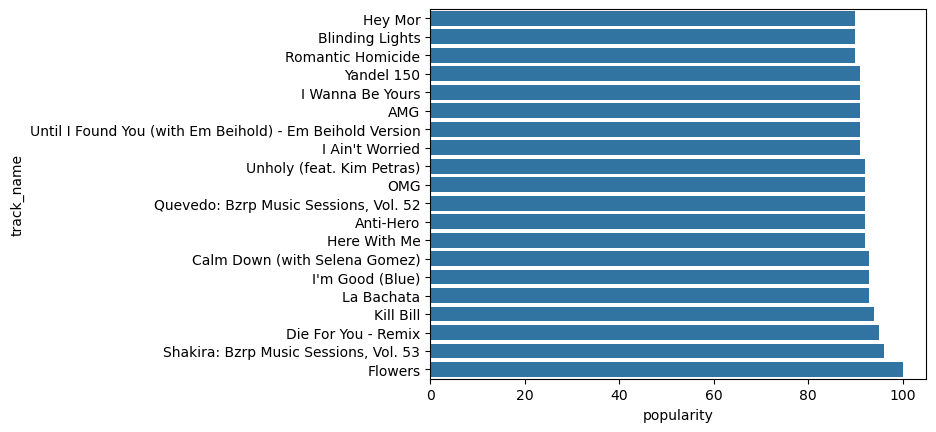

In [20]:
sns.barplot(x='popularity', y='track_name', data= most_popular_20)

In [21]:
most_pop_track_genres= Merged_eda[['track_name','popularity','genre']]
first_20_sorted= most_pop_track_genres.sort_values(by='popularity', ascending= True)
most_popular_genre = first_20_sorted[-20:]
print(most_popular_genre)

                                                track_name  popularity  \
1072110                                            Hey Mor          90   
962612                                     Blinding Lights          90   
1072373                                  Romantic Homicide          90   
1105899                                         Yandel 150          91   
633284                                    I Wanna Be Yours          91   
1086150                                                AMG          91   
1072346  Until I Found You (with Em Beihold) - Em Beiho...          91   
1068697                                    I Ain't Worried          91   
1072378                          Unholy (feat. Kim Petras)          92   
1154688                                                OMG          92   
1075110              Quevedo: Bzrp Music Sessions, Vol. 52          92   
1072375                                          Anti-Hero          92   
1072376                               

Looks like pop is the most popular song genre.

In [22]:
# Checking unique values of genre column

Merged_eda['genre'].unique()

array(['acoustic', 'opera', 'party', 'piano', 'pop', 'new-age',
       'minimal-techno', 'metalcore', 'progressive-house', 'psych-rock',
       'power-pop', 'punk', 'pop-film', 'house', 'indian', 'hip-hop',
       'hardcore', 'hard-rock', 'hardstyle', 'heavy-metal', 'k-pop',
       'jazz', 'metal', 'indie-pop', 'industrial', 'soul', 'spanish',
       'sleep', 'punk-rock', 'samba', 'sertanejo', 'salsa', 'rock-n-roll',
       'romance', 'groove', 'guitar', 'grindcore', 'goth', 'ska',
       'show-tunes', 'singer-songwriter', 'techno', 'trance', 'tango',
       'trip-hop', 'swedish', 'sad', 'rock', 'dub', 'electronic', 'emo',
       'folk', 'forro', 'dubstep', 'edm', 'electro', 'dancehall',
       'death-metal', 'country', 'dance', 'drum-and-bass', 'disco',
       'german', 'garage', 'gospel', 'french', 'funk', 'afrobeat',
       'alt-rock', 'ambient', 'cantopop', 'club', 'comedy', 'classical',
       'chill', 'black-metal', 'blues', 'deep-house', 'detroit-techno',
       'breakbeat', 'ch

In [23]:
# Finding the most danceable genre

Happy_songs = Merged_eda[['danceability','track_name','genre']]
Happy_songs_sort = Happy_songs.sort_values(by='danceability', ascending=True)
danceable_songs = Happy_songs_sort[-10:]
print(danceable_songs)


        danceability                            track_name           genre
401778         0.989                        FRUITS OF LIFE  minimal-techno
129175         0.989                            Thermonics  minimal-techno
790233         0.990       I Take Ya! - Kolombo's 2017 Mix  minimal-techno
218829         0.990                              New Life  minimal-techno
755881         0.990                          Nobody Dance            funk
692116         0.991                        Royal Insanity  detroit-techno
538770         0.991                              Trombone  minimal-techno
354255         0.992                        Close the Door  minimal-techno
327776         0.992                           Hospitality          comedy
400142         0.993  Roll Like Dis / Cha-cha Slide Part 2           party


The genre column looks very diverse.

In [24]:
# Finding the most listed genre in the dataset

Merged_eda['genre'].value_counts()

genre
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: count, Length: 82, dtype: int64

There are about 82 genres in the dataset.

Of all the features in the dataset, the main feature which will be used in the proposed predictive model is popularity. 

In [25]:
# Getting a statistical summary of popularity column

Merged_eda['popularity'].describe()

count    1.159764e+06
mean     1.838312e+01
std      1.588554e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      2.900000e+01
max      1.000000e+02
Name: popularity, dtype: float64

In [26]:
Merged_eda['popularity'].unique()

array([ 37,   0,   1,  13,  18,  12,  11,   7,   3,   4,   2,  16,   5,
        21,   6,   8,  17,  22,  29,  23,   9,  10,  31,  70,  65,  68,
        20,  15,  14,  47,  48,  39,  38,  30,  19,  33,  36,  34,  35,
        25,  69,  24,  26,  28,  27,  32,  51,  52,  53,  44,  41,  40,
        46,  43,  45,  62,  54,  55,  49,  57,  42,  72,  71,  64,  56,
        60,  50,  58,  67,  59,  61,  63,  66,  86,  80,  82,  73,  77,
        74,  76,  75,  78,  79,  84,  87,  81,  90,  85,  83,  91,  88,
        93,  89,  94,  92, 100,  95,  96], dtype=int64)

In [27]:
# Checking the number of occurences of dependent values

Merged_eda['popularity'].value_counts()

popularity
0      158391
1       39820
2       31247
8       30322
9       29249
        ...  
93          3
94          1
100         1
95          1
96          1
Name: count, Length: 98, dtype: int64

The popularity column ranks popularity songs from 0-100. Looks like most of the of the songs in the dataset were not popular.

<Axes: title={'center': 'How duration_min influences popularity'}, xlabel='popularity', ylabel='duration_min'>

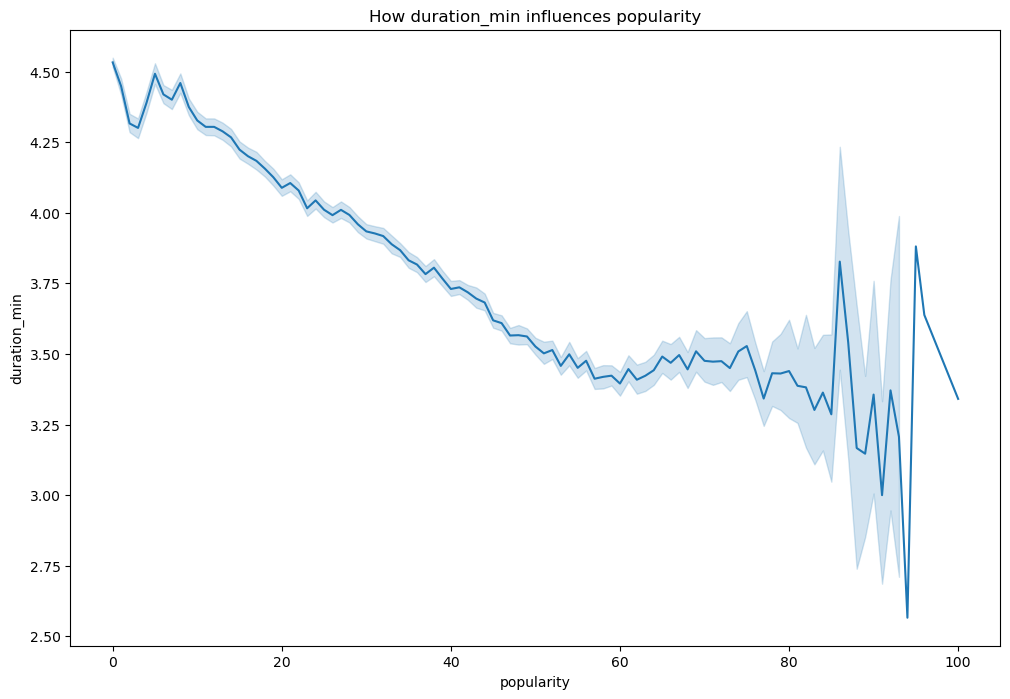

In [28]:
# Visualizing how the other features influence popularity of songs
# Tempo versus popularity

fig,ax = plt.subplots(figsize= (12, 8))
plt.title('How duration_min influences popularity')
plt.xlabel('popularity')
plt.ylabel('duration_min')
sns.lineplot(x='popularity', y='duration_min', data= Merged_eda)


Long songs are not popular songs

<Axes: title={'center': 'How acousticness influences song popularity'}, xlabel='popularity', ylabel='acousticness'>

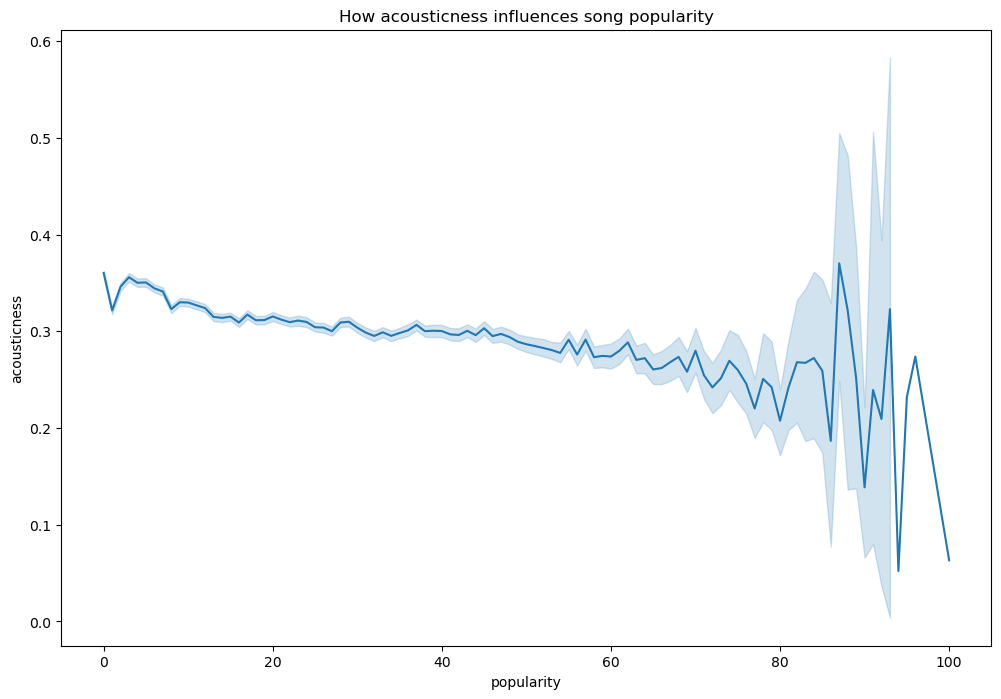

In [29]:
# Acousticness versus popularity

fig,ax = plt.subplots(figsize= (12, 8))
plt.title('How acousticness influences song popularity')
plt.xlabel('popularity')
plt.ylabel('acousticness')
sns.lineplot(x='popularity',y='acousticness', data= Merged_eda)

Most popular songs have low acousticness.

<Axes: title={'center': 'Annual GDP from 2000-2023'}, xlabel='GDP_year', ylabel='GDP'>

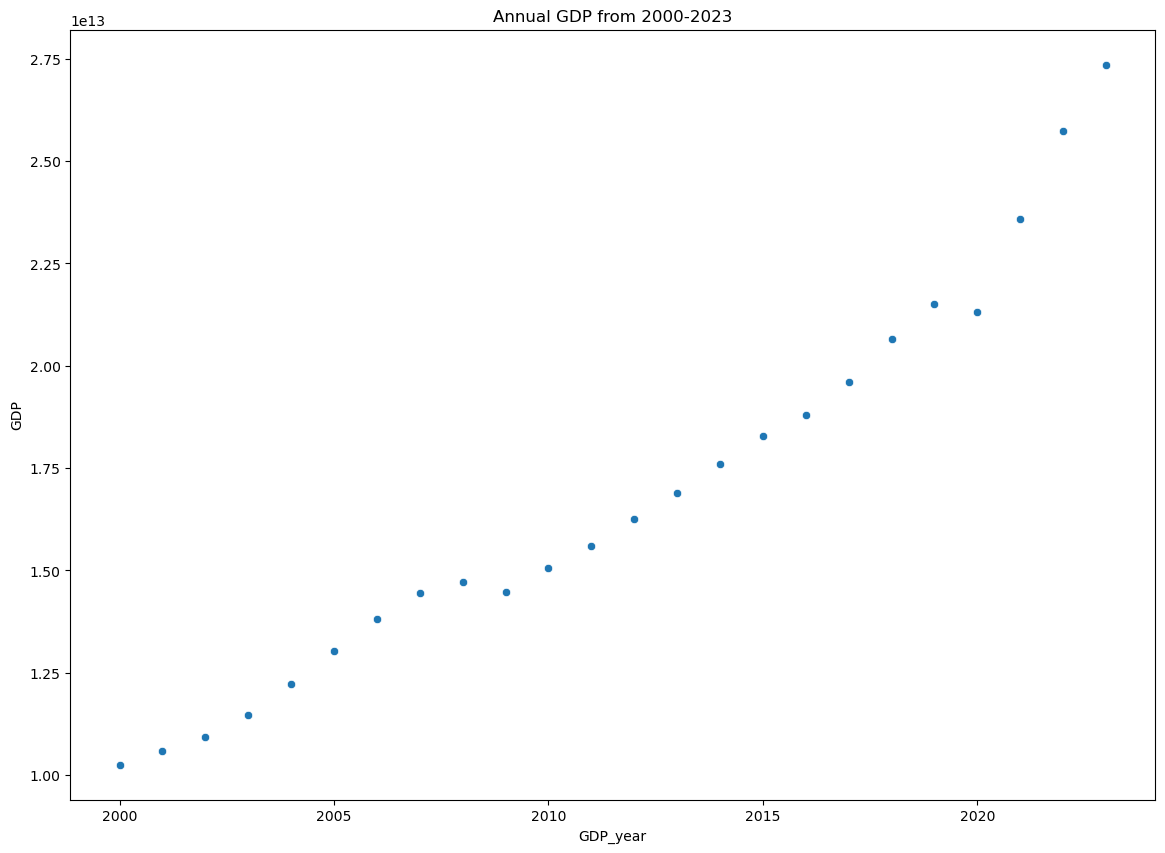

In [30]:
# Viewing the annual GDP rates over the last two decades from GDP dataset

fig, ax= plt.subplots(figsize=(14,10))
plt.title('Annual GDP from 2000-2023')
sns.scatterplot(x= 'GDP_year', y= 'GDP', data= Merged_eda)

#looks like there was a drop in GDP in 2008, 2020 and a sharp increase in 2021

<Axes: title={'center': 'Song popularity per year '}, xlabel='year', ylabel='popularity'>

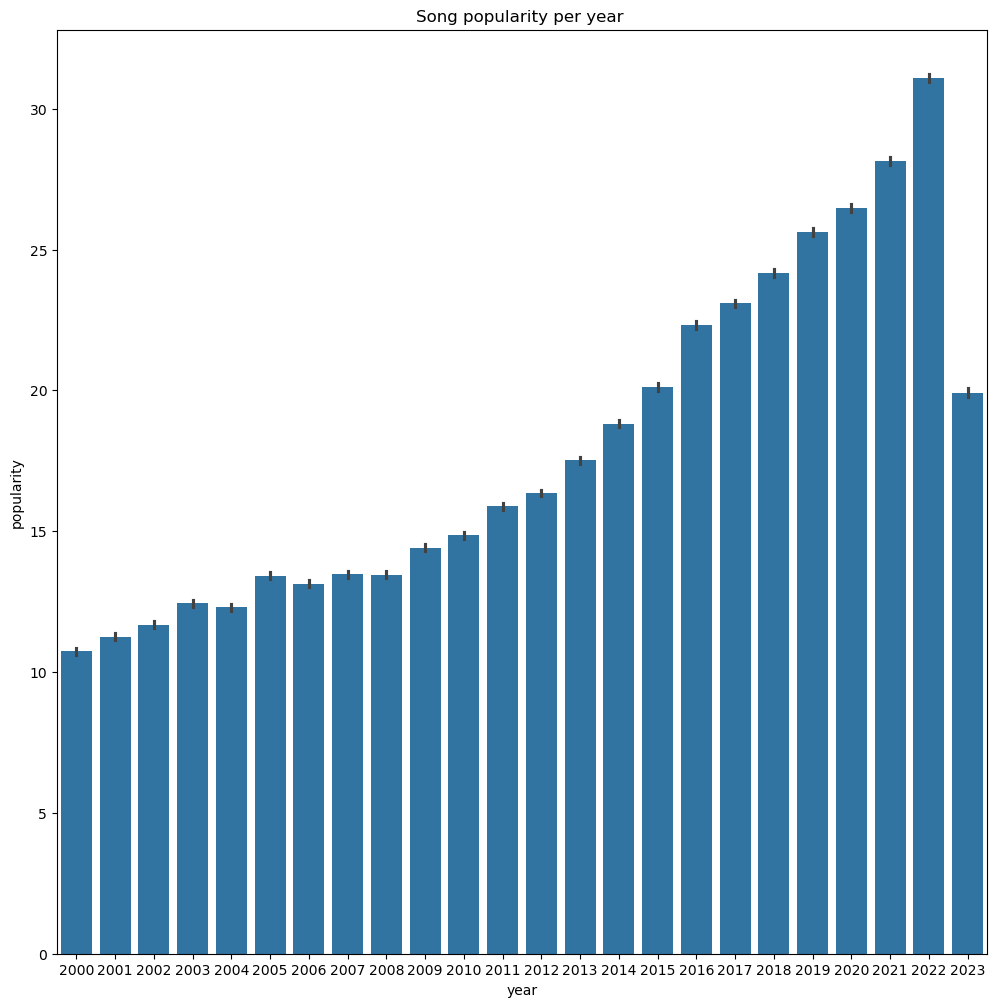

In [31]:
# Checking the trend of song popularity over the years

popu_genre_per_year= Merged_eda[['genre','popularity','year']]
sort_by_year= popu_genre_per_year.sort_values(by='popularity',ascending= True)

fig, ax= plt.subplots(figsize=(12,12))
plt.title('Song popularity per year ')
sns.barplot(x= 'year', y= 'popularity', data= sort_by_year)

In [32]:
# Viewing the correlation between the the dependent variable and othe features
# dropping the genre and track_name columns 

drop_cols = Merged_eda.drop(columns= ['genre','track_name','duration_ms','Unnamed: 0'], axis =1)
drop_cols.head()

,year,popularity,danceability,loudness,acousticness,instrumentalness,liveness,tempo,GDP_year,GDP,duration_min
0,2000,37,0.470,-8.018,0.259,0.000000,0.2040,84.843,2000.0,1.025230e+13,4.110000
1,2000,0,0.258,-29.012,0.991,0.001190,0.0790,89.835,2001.0,1.058180e+13,2.632000
2,2000,0,0.432,-26.235,0.989,0.002200,0.0618,136.726,2002.0,1.093640e+13,3.219783
3,2000,0,0.327,-14.306,0.963,0.000832,0.0888,97.870,2003.0,1.145820e+13,3.467333
4,2000,0,0.385,-24.274,0.992,0.002490,0.0712,83.645,2004.0,1.221370e+13,2.831550


Correlation between various features


<Axes: >

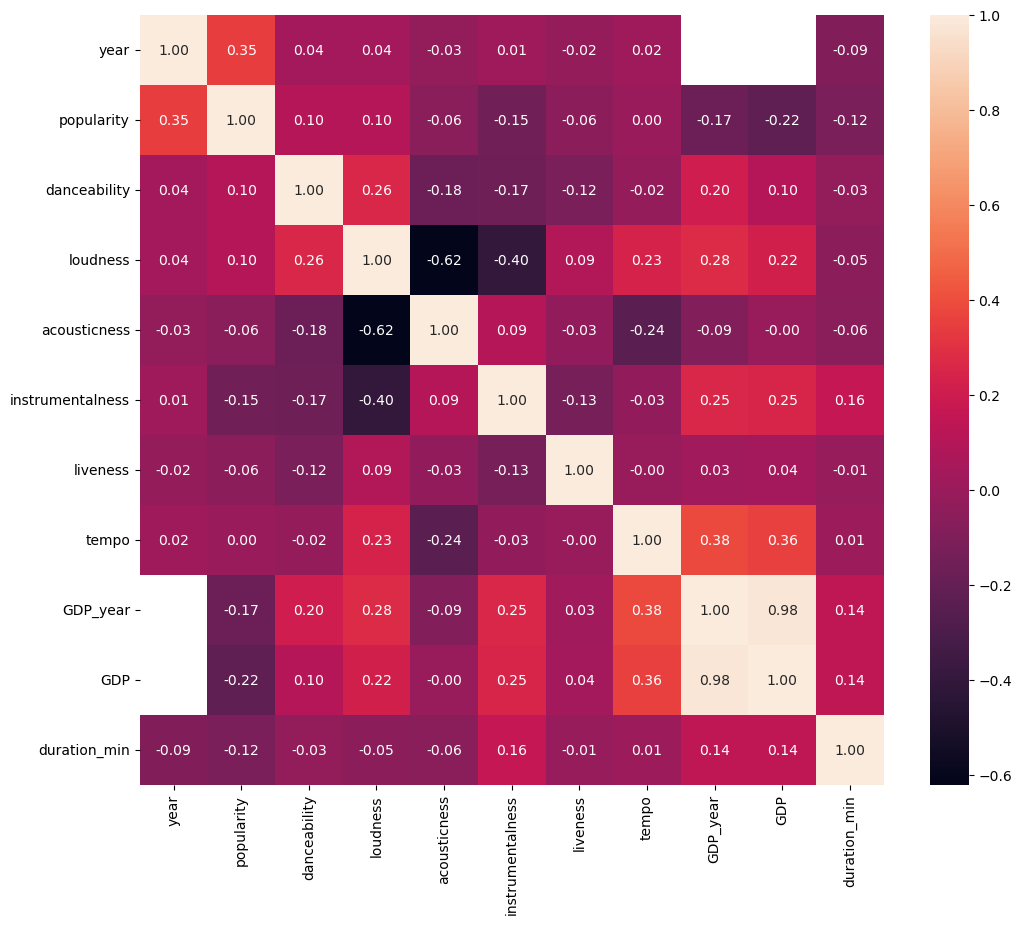

In [33]:
corr = drop_cols.corr()
plt.figure(figsize=(12,10))
print('Correlation between various features')
sns.heatmap(corr, annot=True, fmt=".2f")

# From the heatmap, popularity is:

1. not correlated to tempo
2. weakly correlated to danceability and loudness.
3. negatively corelated to acousticness, liveness, instrumentalness,duration_min, instrumentalness, GDP_year, GDP
4. strongly correlated to year

# Detecting multicollinearity from the heatmap

The heatmap shows  that some of the predictor variables are highly correlated  to each other.There is high correlation between :
1. loudness and instrumentalness 
2. loudness and acousticness
3. GDP_year and GDP

To solve this issue of multicollinearity, Ridge regression model will be used and features will be scaled using StandardScaler() at the preprocessing stage of the project.

In [34]:
Merged_eda.to_csv('Merged_df.csv', sep=',')